In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

### Dataset Load

In [2]:
!pwd

/Users/Christian-Macbook/Ironhack/dataptmad0223_labs/module-3/data-cleaning-challenge


In [3]:
iris_df = pd.read_csv('./iris-data.csv')
iris_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
'''
He cargado el dataset mediante read.csv ya que usando el metodo de Sklearn, no tenia valores nulos,
y la idea era hacer un data cleaning. Sin embargo dejo aqui tambien el metodo con el que se puede
cargar mediante Sklearn:


iris = load_iris()
iris_df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
iris_df
'''

## EDA

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
iris_df['petal_width_cm'].unique()

array([0.2, 0.4, 0.3, nan, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1,
       1.8, 1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [8]:
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [9]:
missing_percentage(iris_df)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000


## Delete missing values

In [10]:
iris_no_nan_rows = iris_df.dropna()
iris_no_nan_rows

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [12]:
iris_no_nan_rows['class'] = iris_no_nan_rows['class'].replace({'Iris-setossa': 'Iris-setosa',
                                         'versicolor': 'Iris-versicolor'})

/var/folders/19/xp05rklx1dsfj3fpvkq0qry00000gn/T/ipykernel_92293/815138795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_no_nan_rows['class'] = iris_no_nan_rows['class'].replace({'Iris-setossa': 'Iris-setosa',


In [13]:
iris_no_nan_rows['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

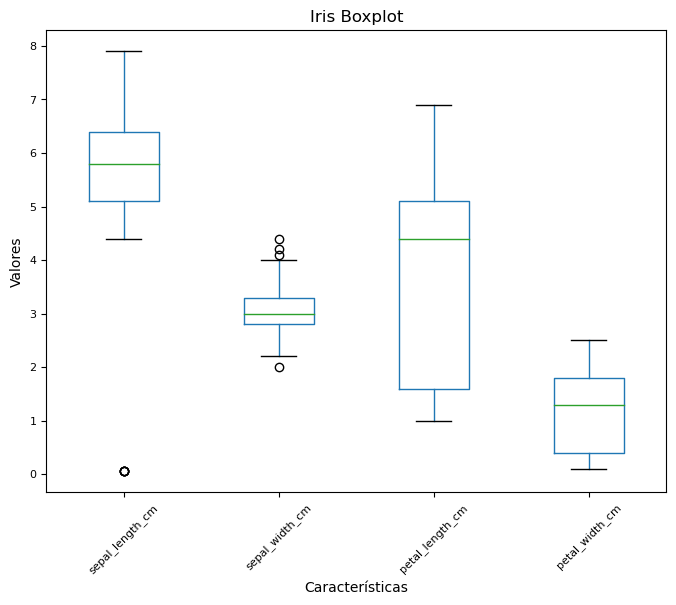

In [16]:
columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

plt.figure(figsize=(8, 6)) 
iris_one_hot_encoding.boxplot(column=columns)
plt.xticks(rotation=45)
plt.grid(False)
plt.tick_params(axis='both', which='both', labelsize=8)
plt.xlabel('Características')
plt.ylabel('Valores')
plt.title('Iris Boxplot')
plt.show()

## One Hot Encoding

In [14]:
iris_one_hot_encoding = pd.get_dummies(iris_no_nan_rows, 
                                          columns=['class'], 
                                          drop_first=False)
iris_one_hot_encoding

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,2.3,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [22]:
final_iris_df_csv = './iris_final_df.csv'
iris_one_hot_encoding.to_csv(final_iris_df_csv)
print(f"El DataFrame se ha guardado en '{final_iris_df_csv}' como archivo CSV.")

El DataFrame se ha guardado en './iris_final_df.csv' como archivo CSV.
